<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2023_10_06_SrijaChitturi_Project67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Getting Started:

1. Click on the following link to open the Colab file for this project.

   Link on Panel  

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project1** format.

4. Now, write your code in the prescribed code cells.


---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Multicollinearity
 3. Variance Inflation Factor



---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the yearly amount spent by the customers in shopping from an Ecommerce website. Find out if there exists multicollinearity in the dataset using Variance Inflation Factor.

---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Exploratory Data Analysis

**Activity 3:** Train-Test Split

**Activity 4:** Model Training using `statsmodels.api`

**Activity 5:** Calculate VIF using `variance_inflation_factor`




---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **ecommerce-customers** dataset using the below link. This dataset consists of following columns:

|Columns|Description|
|--|--|
|Email|Email ID of the customer|
|Address|Address of the customer|
|Avatar|Color Avatar|
|Avg. Session Length|Average session of in-store style advice sessions|
|Time on App|Average time spent on App in minutes |
|Time on Website|Average time spent on Website in minutes |
|Length of Membership|How many years the customer has been a member|
|Yearly Amount Spent|Amount spent on items yearly|



   **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/ecommerce-customers.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.
- Also, drop the columns `Email`, `Address` and `Avatar` as they are not required for further analysis.

In [ ]:
# Import modules
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/ecommerce-customers.csv')

# Print first five rows using head() function
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
# Drop unnecessary columns
drop_list = ['Email', 'Address', 'Avatar']
df = df.drop(columns=drop_list)
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


---

#### Activity 2: Exploratory Data Analysis

Create the scatter plots between each independent variables and the target variable. Determine which independent variable(s) shows linear relationship with the target variable `Yearly Amount Spent`.

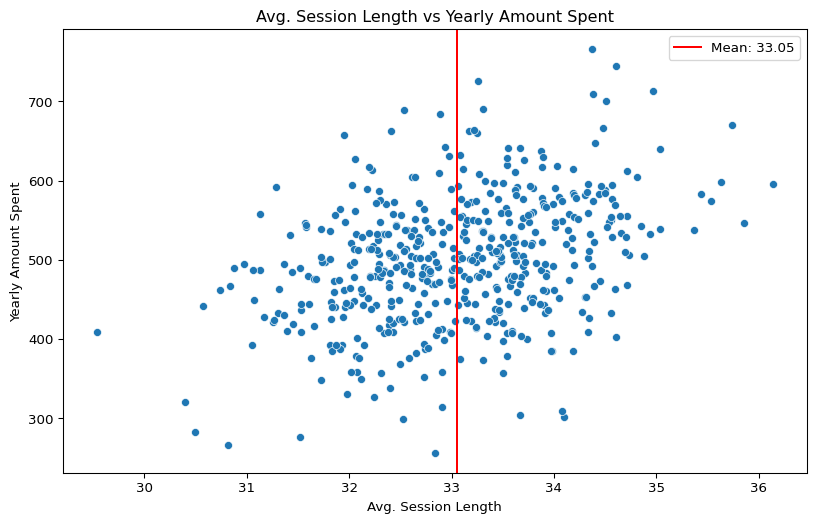

In [ ]:
# Create scatter plot with 'Avg. Session Length' on X-axis and 'Yearly Amount Spent' on Y-axis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6), dpi=96)
plt.title("Avg. Session Length vs Yearly Amount Spent")
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df)
plt.axvline(df['Avg. Session Length'].mean(), color='r', label=f"Mean: {df['Avg. Session Length'].mean():.2f}")
plt.xlabel("Avg. Session Length")
plt.ylabel("Yearly Amount Spent")
plt.legend()
plt.show()

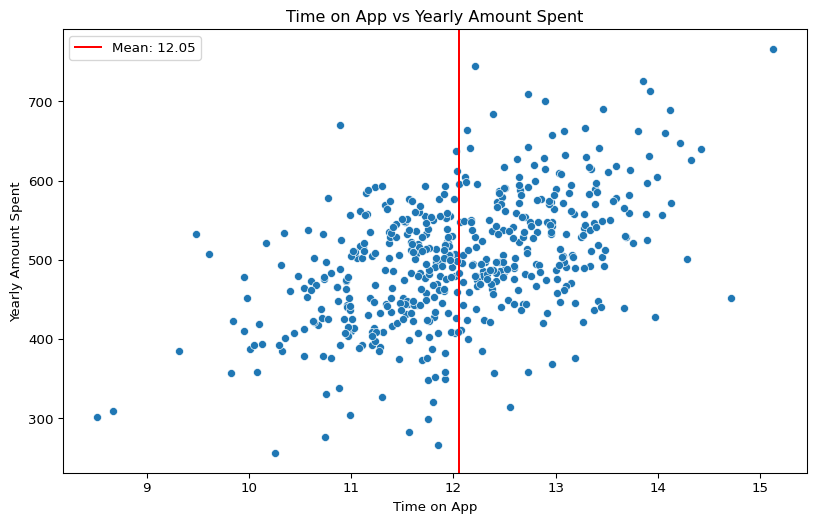

In [ ]:
# Create scatter plot with 'Time on App' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(10,6), dpi=96)
plt.title("Time on App vs Yearly Amount Spent")
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.axvline(df['Time on App'].mean(), color='r', label=f"Mean: {df['Time on App'].mean():.2f}")
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.legend()
plt.show()

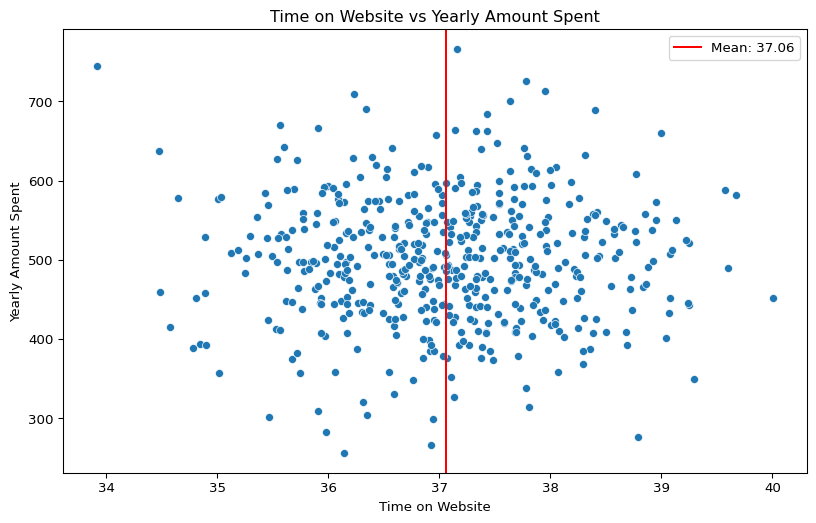

In [ ]:
# Create scatter plot with 'Time on Website' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(10,6), dpi=96)
plt.title("Time on Website vs Yearly Amount Spent")
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.axvline(df['Time on Website'].mean(), color='r', label=f"Mean: {df['Time on Website'].mean():.2f}")
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")
plt.legend()
plt.show()

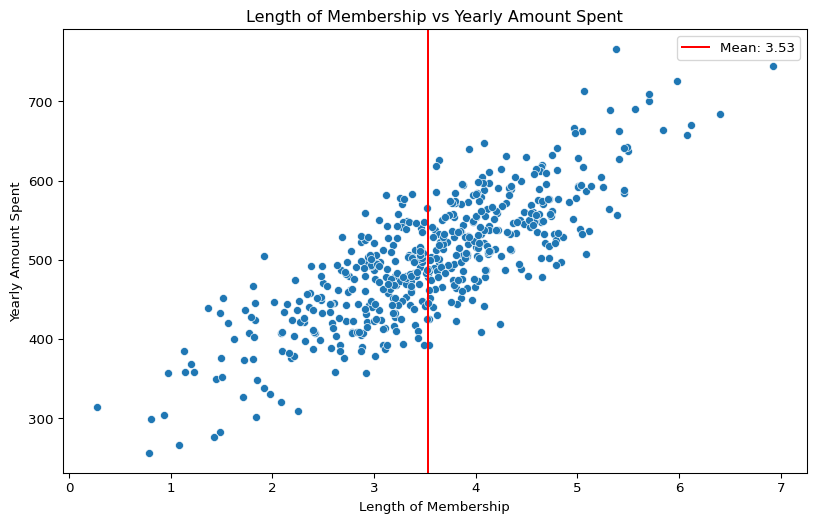

In [ ]:
# Create scatter plot with 'Length of Membership' on X-axis and 'Yearly Amount Spent' on Y-axis
plt.figure(figsize=(10,6), dpi=96)
plt.title("Length of Membership vs Yearly Amount Spent")
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.axvline(df['Length of Membership'].mean(), color='r', label=f"Mean: {df['Length of Membership'].mean():.2f}")
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.legend()
plt.show()

**Q:** Based on the scatter plots, which independent variable seems to have the best linear relationship with the target variable?

**A:** `Length of Membership`.

---

#### Activity 3: Train-Test Split

We need to predict the value of `Yearly Amount Spent` variable, using other variables. Thus, `Yearly Amount Spent` is the target or dependent variable and other columns except `Yearly Amount Spent` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
features = list(df.columns)
features.remove('Yearly Amount Spent')

x = df[features]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

---

#### Activity 4: Model Training using `statsmodels.api`

Perform the following tasks:
- Implement multiple linear regression using `statsmodels.api` module and find the values of all the regression coefficients using this module.
-Print the statistical summary of the regression model.


In [ ]:
# Build a linear regression model using the 'statsmodels.api' module.
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# Add a constant to feature variables
x_train_sm = sm.add_constant(X_train)
# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const                  -1056.072059
Avg. Session Length       25.706762
Time on App               38.572608
Time on Website            0.625201
Length of Membership      61.717676
dtype: float64

In [ ]:
# Print statistical summary of the model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5600.
Date:                 Fri, 06 Oct 2023   Prob (F-statistic):          8.40e-302
Time:                         23:52:07   Log-Likelihood:                -1241.5
No. Observations:                  335   AIC:                             2493.
Df Residuals:                      330   BIC:                             2512.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1056.0721     27.218    -38.800      0.000   -1109.615   -1002.529
Avg. Session Length     25.7068      0.546     47.083      0.000      24.633      26.781
Time on App             38.5726      0.539     71.567      0.000      37.512      39.633
Time on Website          0.6252      0.538      1.163      0.246      -0.433       1.683
Length of Membership    61.7177      0.525    117.477      0.000      60.684      62.751
==============================================================================
Omnibus:                        1.793   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.520
Skew:                          -0.123   Prob(JB):                        0.468
Kurtosis:                       3.220   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 0.985


-----

#### Activity 5: Calculate VIF using `variance_inflation_factor`

Calculate the VIF values for each independent variables using the `variance_inflation_factor` function of the `statsmodels.stats.outliers_influence` module.


In [ ]:
# Calculate the VIF values for each independent variable using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,const,2522.11
1,Avg. Session Length,1.00
2,Time on App,1.01
3,Time on Website,1.01
4,Length of Membership,1.00


-------